In [1]:
import os
from glob import glob
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv2
import tensorflow as tf

In [2]:
model = tf.keras.applications.vgg16.VGG16(
    include_top=True,
    weights='imagenet',
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation='softmax'
)

In [3]:
labels_file = "https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt"

#download labels and creates a maps
downloaded_file = tf.keras.utils.get_file("labels.txt", origin=labels_file)

classes = []

with open(downloaded_file) as f:
  labels = f.readlines()
  classes = [l.strip() for l in labels]


Found 225 files belonging to 1 classes.
1/1 [==============================] - 2s 2s/step
(1)  763 - restaurant: 0.14254149794578552
(2)  468 - butcher shop: 0.12330468744039536
(3)  583 - grocery store: 0.05597768723964691
(4)  789 - shoe shop: 0.0417027585208416
(5)  455 - bookshop: 0.03568752855062485


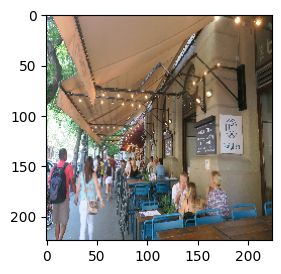

1/1 [==============================] - 0s 20ms/step
(1)  763 - restaurant: 0.1529204249382019
(2)  823 - steel drum: 0.06860543042421341
(3)  646 - maypole: 0.05341232940554619
(4)  866 - toyshop: 0.05241741985082626
(5)  583 - grocery store: 0.046301018446683884


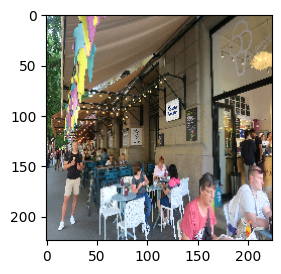

1/1 [==============================] - 0s 24ms/step
(1)  881 - unicycle: 0.2387530654668808
(2)  976 - lakeside: 0.10866092145442963
(3)  445 - bicycle-built-for-two: 0.10255409777164459
(4)  979 - seashore: 0.08425389230251312
(5)  836 - sundial: 0.045660603791475296


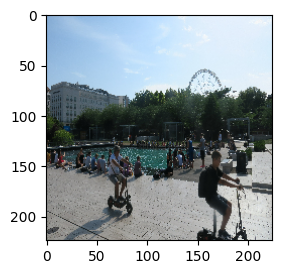

1/1 [==============================] - 0s 20ms/step
(1)  976 - lakeside: 0.15070520341396332
(2)  461 - breakwater: 0.13584809005260468
(3)  979 - seashore: 0.12394379079341888
(4)  647 - maze: 0.05829067900776863
(5)  874 - triumphal arch: 0.0535815954208374


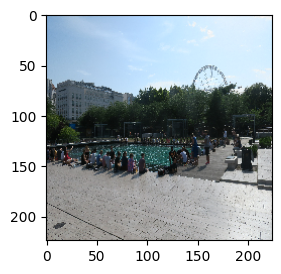

1/1 [==============================] - 0s 24ms/step
(1)  880 - umbrella: 0.26325786113739014
(2)  537 - dock: 0.06570446491241455
(3)  725 - pirate: 0.06302235275506973
(4)  979 - seashore: 0.05545215681195259
(5)  976 - lakeside: 0.024484341964125633


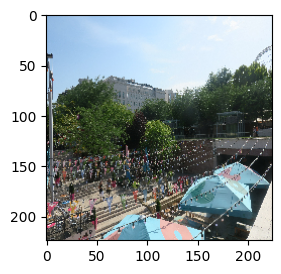

1/1 [==============================] - 0s 20ms/step
(1)  840 - suspension bridge: 0.20092855393886566
(2)  461 - breakwater: 0.09959061443805695
(3)  537 - dock: 0.08205541968345642
(4)  976 - lakeside: 0.062270648777484894
(5)  719 - pier: 0.03920026496052742


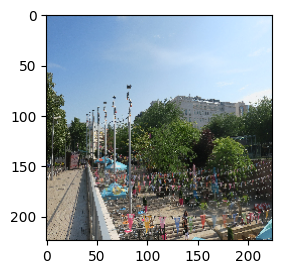

1/1 [==============================] - 0s 17ms/step
(1)  699 - palace: 0.6744740605354309
(2)  664 - monastery: 0.06995754688978195
(3)  874 - triumphal arch: 0.05844029411673546
(4)  443 - bell cote: 0.04182789474725723
(5)  830 - streetcar: 0.02813904732465744


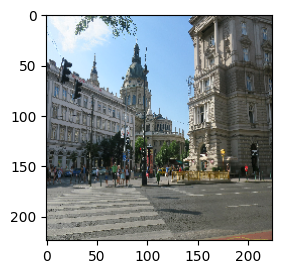

1/1 [==============================] - 0s 22ms/step
(1)  699 - palace: 0.33538126945495605
(2)  874 - triumphal arch: 0.2713960111141205
(3)  443 - bell cote: 0.10423349589109421
(4)  664 - monastery: 0.05449886620044708
(5)  498 - church: 0.029886474832892418


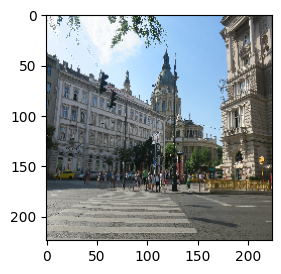

1/1 [==============================] - 0s 18ms/step
(1)  498 - church: 0.2786771357059479
(2)  664 - monastery: 0.22727639973163605
(3)  443 - bell cote: 0.1669122576713562
(4)  699 - palace: 0.08732354640960693
(5)  874 - triumphal arch: 0.06387709826231003


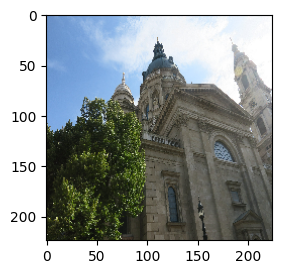

1/1 [==============================] - 0s 17ms/step
(1)  498 - church: 0.23147286474704742
(2)  664 - monastery: 0.20849363505840302
(3)  443 - bell cote: 0.14611540734767914
(4)  699 - palace: 0.1308591514825821
(5)  874 - triumphal arch: 0.07335963100194931


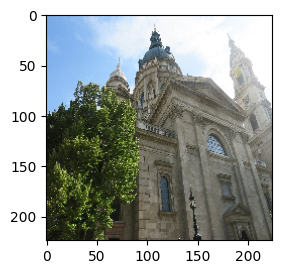

In [4]:
test_ds = tf.keras.utils.image_dataset_from_directory(
    "testing_database",
    color_mode='rgb',
    shuffle=False,
    batch_size=1,
    image_size=(224, 224),
)


for img, label in test_ds.take(10):
    plt.subplot(1,2,1)
    imshow = np.array(img[0], dtype=np.uint8)

    plt.imshow(imshow)

    img = tf.keras.applications.vgg16.preprocess_input(img)
    
    probabilities = model.predict(img)
    
    top_5 = tf.argsort(probabilities, axis=-1, direction="DESCENDING")[0][:5].numpy()
    np_classes = np.array(classes)

    # Some models include an additional 'background' class in the predictions, so
    # we must account for this when reading the class labels.
    includes_background_class = probabilities.shape[1] == 1001

    for i, item in enumerate(top_5):
        class_index = item if includes_background_class else item + 1
        line = f'({i+1}) {class_index:4} - {classes[class_index]}: {probabilities[0][top_5][i]}'
        print(line)
    
    # plt.title("Prediction: ", )
    
    # plt.subplot(1,2,2)
    # plt.imshow(cv2.cvtColor(output_img, cv2.COLOR_RGB2BGR))
    plt.show()
